<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Jisha_Obukwelu_DSPT3_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

###1. Iterative Bayesian Theorem
DEF prob_drunk_given_positive

In [114]:
#Trying out class example
p_plus_user = 0.99
p_user = 0.005
p_non_user = 0.995

p_user_plus = (p_plus_user*p_user)/(p_plus_user*p_user + (1-p_plus_user)*(p_non_user))
p_user_plus

0.33221476510067094

In [0]:
#psuedo code
#posterior P(user|+)
#P(user|+) = prob_drunk_prior
#P(+|user)P(user) = prob_positive_drunk * prob_drunk_prior
#P(+|user)P(user) = prob_positive_drunk * prob_drunk_prior
#p(+|non-user)p(non-user) = (prob_positive)*(1-prob_positive_drunk )

In [0]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):

  prior_drunk = []
  for i in range (0,20):
    prob_drunk_prior = (prob_positive_drunk*prob_drunk_prior)/(prob_positive_drunk*prob_drunk_prior + prob_positive*(1-prob_drunk_prior))
    # print(round(prob_drunk_prior, 10))
    prior_drunk.append(prob_drunk_prior)           
  return prior_drunk

In [117]:
prob_drunk_given_positive(.001, 0.08, 1)

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192,
 0.9999999991418655,
 0.9999999999313492,
 0.999999999994508,
 0.9999999999995607,
 0.9999999999999648,
 0.9999999999999972,
 0.9999999999999998,
 1.0,
 1.0,
 1.0]

### 2. scipy.stats.bayes_mvs

#### House Votes

In [118]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-10-09 04:46:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-10-09 04:46:55 (629 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
#Add headers to data
df = pd.read_csv('house-votes-84.data', 
                header = None, 
               names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
                         'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                         'el-salvador-aid', 'religious-groups-in-schools', 
                         'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                         'mx-missile', 'immigration','synfuels-corporation-cutback', 
                         'education-spending', 'superfund-right-to-sue', 
                         'crime', 'duty-free-exports', 
                         'export-administration-act-south-africa'])

#Clean data
df = df.replace({'y':1, 'n':0, '?':np.NaN})

reps = df[df['party'] == 'republican']
dems = df[df['party'] == 'democrat']


####Confidence Interval

In [0]:
def conf_int (data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

In [122]:
conf_int(dem['handicapped-infants'].dropna())

(0.6046511627906976, 0.5445926997425515, 0.6647096258388437)

####Bayesian Interval

In [123]:
stats.bayes_mvs(dem['handicapped-infants'].dropna(), alpha=.95)

(Mean(statistic=0.6046511627906976, minmax=(0.5445926997425515, 0.6647096258388437)),
 Variance(statistic=0.24186046511627907, minmax=(0.20334567221093322, 0.2875424084350645)),
 Std_dev(statistic=0.4913111995028866, minmax=(0.4509386568159057, 0.536229809349559)))

### 3. Traditional vs. Bayesian

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):

  prior_drunk = []
  for i in range (0,20):
    prob_drunk_prior = (prob_positive_drunk*prob_drunk_prior)/(prob_positive_drunk*prob_drunk_prior + prob_positive*(1-prob_drunk_prior))
    print(round(prob_drunk_prior, 5))
    prior_drunk.append(prob_drunk_prior)           
  return prior_drunk

In [0]:
def frequentist (positive,false_positive):
  prior_drunk = []
  for i in range (0, 20):
    positive_drunk = positive - false_positive**(i)
    prior_drunk.append(positive_drunk)
  return prior_drunk

In [0]:
bayesian = prob_drunk_given_positive(.001, 0.08, 1)
frequentist = frequentist(1, .08)

In [146]:
bayesian

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192,
 0.9999999991418655,
 0.9999999999313492,
 0.999999999994508,
 0.9999999999995607,
 0.9999999999999648,
 0.9999999999999972,
 0.9999999999999998,
 1.0,
 1.0,
 1.0]

In [147]:
frequentist

[0.0,
 0.92,
 0.9936,
 0.999488,
 0.99995904,
 0.9999967232,
 0.999999737856,
 0.99999997902848,
 0.9999999983222784,
 0.9999999998657823,
 0.9999999999892626,
 0.999999999999141,
 0.9999999999999313,
 0.9999999999999944,
 0.9999999999999996,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

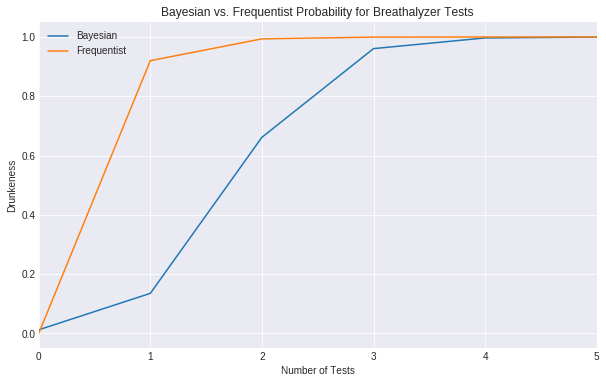

In [148]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(bayesian, label='Bayesian')
ax.plot(frequentist, label='Frequentist')
ax.set_ylabel('Drunkeness')
ax.set_xlabel('Number of Tests')
ax.set_title('Bayesian vs. Frequentist Probability for Breathalyzer Tests')
ax.set_xlim(0,5)
ax.legend()
plt.show()

###4. In your own words, summarize the difference between Bayesian and Frequentist statistics

The difference between Bayesian and Frequentist/Traditional statistics is 
- Bayesian Inference updates hypothesis as you get more information. This is a more intuitive approach to statistics.
- Frequentist believe that there is an equal likelihood of all outcomes. Here you just divide the number of events by the number of possible events.


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)